In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
mydata = pd.read_csv("../data/TP_CAdata.csv")
mydata

,CustID,AtmosImp,AvgCost,Gender,Race,LunchFreq,DinnerFreq,Tvfreq,Webfreq,OOHfreq,Radiofreq,Smfreq,HHI,FoodImp,ServImp,NumInParty,NumKids,Age
0,1,3,1,1,5,1,3,2,3,2,1,2,5,4,5,4,2,5
1,2,2,1,0,2,1,3,3,4,3,1,2,4,4,5,4,2,4
2,3,1,2,0,5,1,2,4,1,1,1,1,2,2,1,2,1,4
3,4,2,3,1,1,1,3,2,4,2,1,2,7,4,5,4,2,5
4,5,2,2,0,2,1,3,2,3,2,1,2,5,4,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2,3,0,3,1,2,2,3,2,1,2,5,4,5,4,4,4
196,197,2,2,0,1,3,4,2,3,2,1,2,5,5,5,4,1,4
197,198,7,5,0,3,1,2,2,3,2,2,3,6,6,5,2,2,3
198,199,5,4,1,3,2,3,2,2,2,2,3,3,5,3,2,1,3


In [6]:
column_names = mydata.columns
print(column_names)

Index(['CustID', 'AtmosImp', 'AvgCost', 'Gender', 'Race', 'LunchFreq',
       'DinnerFreq', 'Tvfreq', 'Webfreq', 'OOHfreq', 'Radiofreq', 'Smfreq',
       'HHI', 'FoodImp', 'ServImp', 'NumInParty', 'NumKids', 'Age'],
      dtype='object')


In [12]:
mydata[['AtmosImp', 'AvgCost', 'LunchFreq',
       'DinnerFreq', 'Tvfreq', 'Webfreq', 'OOHfreq', 'Radiofreq', 'Smfreq',
       'HHI', 'FoodImp', 'ServImp', 'NumInParty', 'NumKids', 'Age']].describe()

,AtmosImp,AvgCost,LunchFreq,DinnerFreq,Tvfreq,Webfreq,OOHfreq,Radiofreq,Smfreq,HHI,FoodImp,ServImp,NumInParty,NumKids,Age
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.340000,2.83500,2.420000,3.075000,2.345000,3.22500,2.360000,1.395000,2.685000,4.475000,4.315000,3.990000,4.070000,1.000000,4.840000
std,2.067796,1.16816,1.253578,1.007198,0.767411,1.05353,0.982459,0.548158,1.068402,1.476576,1.369361,1.526944,1.380081,1.125314,0.984503
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
25%,2.000000,2.00000,1.000000,3.000000,2.000000,3.00000,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000,3.000000,0.000000,4.000000
50%,6.000000,2.00000,3.000000,3.000000,2.000000,3.00000,2.000000,1.000000,2.500000,5.000000,4.000000,4.000000,4.000000,1.000000,5.000000
75%,6.000000,4.00000,4.000000,4.000000,3.000000,4.00000,3.000000,2.000000,4.000000,5.000000,6.000000,5.000000,5.000000,2.000000,5.250000
max,7.000000,7.00000,5.000000,5.000000,5.000000,5.00000,5.000000,3.000000,5.000000,7.000000,7.000000,7.000000,8.000000,6.000000,7.000000


In [13]:
mydata[['AtmosImp', 'AvgCost', 'LunchFreq',
       'DinnerFreq', 'Tvfreq', 'Webfreq', 'OOHfreq', 'Radiofreq', 'Smfreq',
       'HHI', 'FoodImp', 'ServImp', 'NumInParty', 'NumKids', 'Age']].var()

AtmosImp      4.275779
AvgCost       1.364598
LunchFreq     1.571457
DinnerFreq    1.014447
Tvfreq        0.588920
Webfreq       1.109925
OOHfreq       0.965226
Radiofreq     0.300477
Smfreq        1.141482
HHI           2.180276
FoodImp       1.875151
ServImp       2.331558
NumInParty    1.904623
NumKids       1.266332
Age           0.969246
dtype: float64

The scales of the variables I am using are fairly similar in scale so there shouldn't be that much of a skew. I picked these varaibles because the pertain mostly to restauraunt consumer behavior.

In [19]:
columns_to_include = ['AtmosImp', 'AvgCost', 'LunchFreq', 'DinnerFreq', 'FoodImp', 'ServImp', 'NumInParty']


CAdata = mydata[columns_to_include]
CAdata

,AtmosImp,AvgCost,LunchFreq,DinnerFreq,FoodImp,ServImp,NumInParty
0,3,1,1,3,4,5,4
1,2,1,1,3,4,5,4
2,1,2,1,2,2,1,2
3,2,3,1,3,4,5,4
4,2,2,1,3,4,5,4
...,...,...,...,...,...,...,...
195,2,3,1,2,4,5,4
196,2,2,3,4,5,5,4
197,7,5,1,2,6,5,2
198,5,4,2,3,5,3,2


In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(CAdata)

In [21]:
# Perform Hierarchical Cluster Analysis using Ward linkage method
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

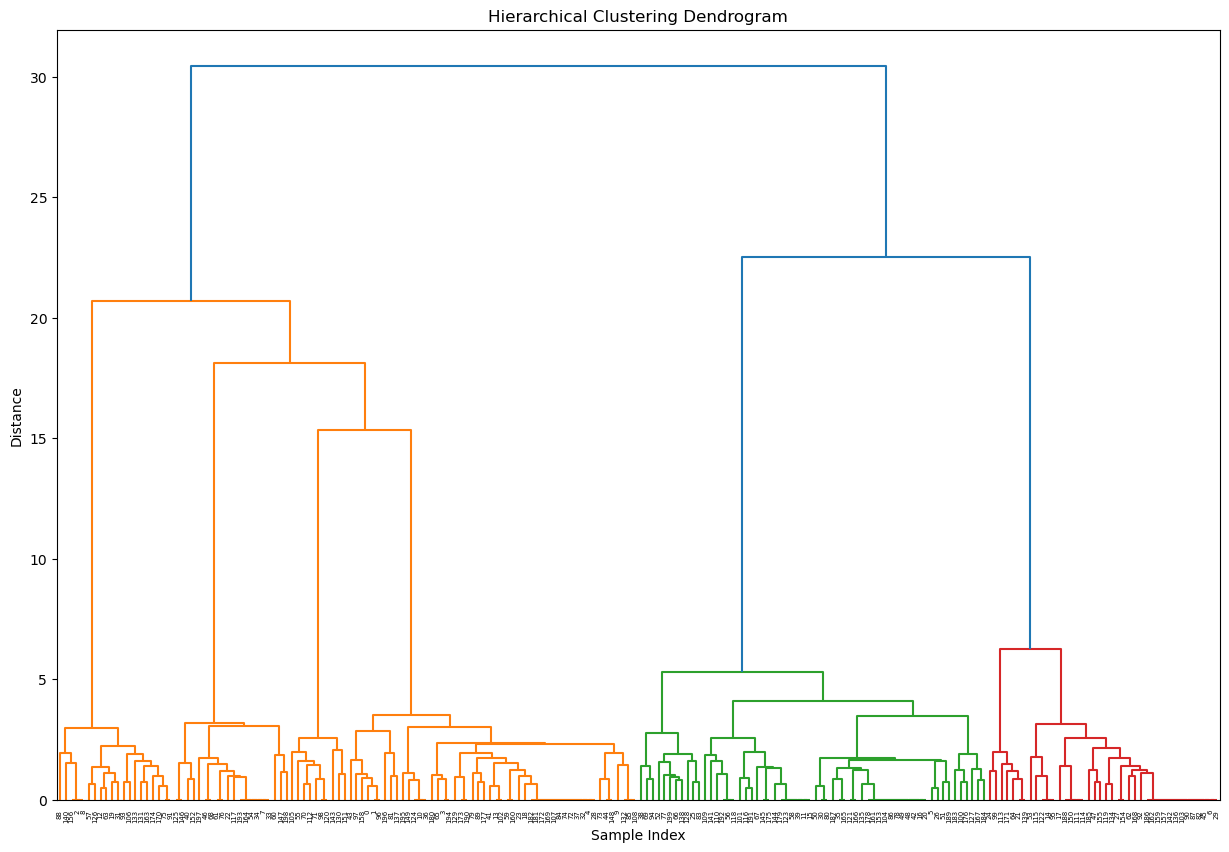

In [23]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=CAdata.index.tolist(), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [25]:
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

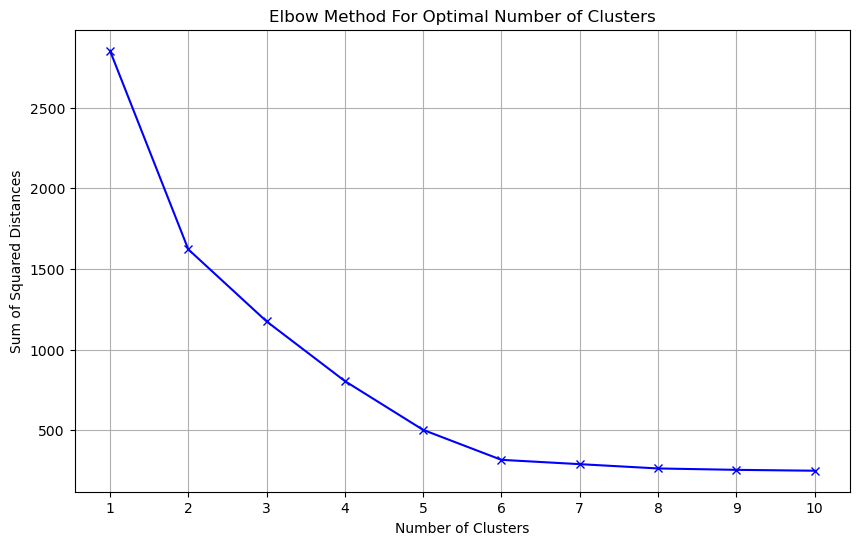

In [26]:
range_clusters = range(1, 11)
sum_squared_distances = []

# Compute the sum of squared distances for each number of clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(CAdata)
    sum_squared_distances.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.xticks(np.arange(min(range_clusters), max(range_clusters)+1, 1.0))
plt.grid(True)
plt.show()


From this dendogram and elbow plot, I would choose to create 6 clusters.

In [27]:
kmeans_6_clusters = KMeans(n_clusters=6, random_state=42)
kmeans_6_clusters.fit(data_scaled)

CAdata['Cluster'] = kmeans_6_clusters.labels_
segment_profiles_6_clusters = CAdata.groupby('Cluster').mean()

segment_profiles_6_clusters

,AtmosImp,AvgCost,LunchFreq,DinnerFreq,FoodImp,ServImp,NumInParty
Cluster,,,,,,,
0,1.350000,2.050000,1.25,1.250000,1.450,1.200000,2.350000
1,5.975000,4.550000,3.95,4.150000,5.975,5.950000,5.025000
2,2.060000,1.980000,1.16,2.980000,4.000,4.980000,4.000000
3,5.983333,2.483333,3.00,3.116667,4.000,3.033333,5.183333
4,5.950000,3.750000,1.15,2.000000,5.850,3.850000,2.050000
5,2.100000,2.100000,4.00,4.800000,3.800,2.800000,1.400000


Cluster 0: Tends to have lower importance ratings for atmosphere and relatively low average cost, with minimal dining frequency.
Cluster 1: Characterized by high-importance ratings for food and service, higher average cost, and higher dining frequency, with significant media consumption.
Cluster 2: Shows moderate importance ratings for atmosphere, food, and service, with moderate average cost and dining frequencies.
Cluster 3: Similar to Cluster 1 but with slightly different dining frequencies and evaluation variables.
Cluster 4: Notable for high food importance and service ratings, with moderate to high average cost and lower dining frequencies.
Cluster 5: Unique for its dining frequency and relatively moderate ratings for atmosphere, food, and service importance.

Segment Profiles and Labels

Cluster 0: Budget Solo Diners
- Characteristics: Lowest importance ratings for atmosphere and service, low average cost, minimal dining frequency, younger age group, and low household income (HHI).
- Needs: Price-sensitive customers preferring low-cost dining options, likely valuing basic service and convenience over atmosphere or gourmet dining experiences.
- Label: "Budget Solo Diners" reflects their price sensitivity and lower frequency of social dining.
  
Cluster 1: Gourmet Group
- Characteristics: High importance ratings for food and service, higher average cost, and higher dining frequency, alongside significant web and out-of-home media consumption.
- Needs: Prefers quality dining experiences with a focus on food and service quality, likely to dine in groups and values the social aspect of dining.
- Label: "Gourmet Group" captures their preference for quality and group dining experiences.
  
Cluster 2: Family Diners
- Characteristics: Moderate ratings for atmosphere, food, and service, with moderate costs and dining frequencies. High number of kids in the party and higher household income.
- Needs: Balances quality with affordability, focusing on family-friendly dining experiences that cater to both adults and children.
- Label: "Family Diners" reflects their focus on family-oriented dining experiences.

Cluster 3: Social Foodies
- Characteristics: Similar to the Gourmet Group but with slightly different dining frequencies and lower average household income. High social media frequency.
- Needs: Enjoys dining out as a social activity, values food quality and service but is slightly more price-conscious than the Gourmet Group.
- Label: "Social Foodies" emphasizes their social dining habits and interest in food.

Cluster 4: Casual Connoisseurs
- Characteristics: High food importance and service ratings, with moderate to high average cost, lower dining frequencies, and a relatively young age group.
- Needs: Seeks high-quality dining experiences but dines out less frequently, possibly due to budget constraints or personal preference.
- Label: "Casual Connoisseurs" reflects their appreciation for quality without the frequency of visits.
  
Cluster 5: Infrequent Business Diners
- Characteristics: Moderate ratings for atmosphere, food, and service importance with high dining frequency and a very high number in the party when dining, suggesting infrequent but large group/business dining.
- Needs: Likely values convenience and speed, with less emphasis on dining experience, possibly due to the work-related nature of their dining.
- Label: "Infrequent Business Diners" captures the work-related and occasional nature of their dining out.